In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import make_scorer, recall_score

In [2]:
# Load the data
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer_tissues.drop('diagnosis', axis=1), cancer_tissues['diagnosis'], test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
cancer_tissues.head()

Training set shape: (455, 32)
Testing set shape: (114, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Preprocess the data
cancer_tissues = cancer_tissues.drop(['id', 'Unnamed: 32'], axis=1)
cancer_tissues['diagnosis'] = cancer_tissues['diagnosis'].map({'M': 1, 'B': 0})

In [4]:
# Check for null values
cancer_tissues.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Replace NaN values with a specific value (e.g. the median value)
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [59]:
# Apply the RobustScaler to the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

print(f"Logistic Regression Accuracy:: {accuracy:.4f}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:: 0.9883
Logistic Regression Confusion Matrix:
[[107   1]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [7]:
# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Encode the labels in the 'diagnosis' column. 0 for Benign tumors and 1 for Malignant tumors
cancer_tissues['diagnosis'] = label_encoder.fit_transform(cancer_tissues['diagnosis'])

# Print the first few rows of the dataset to confirm the encoding
cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


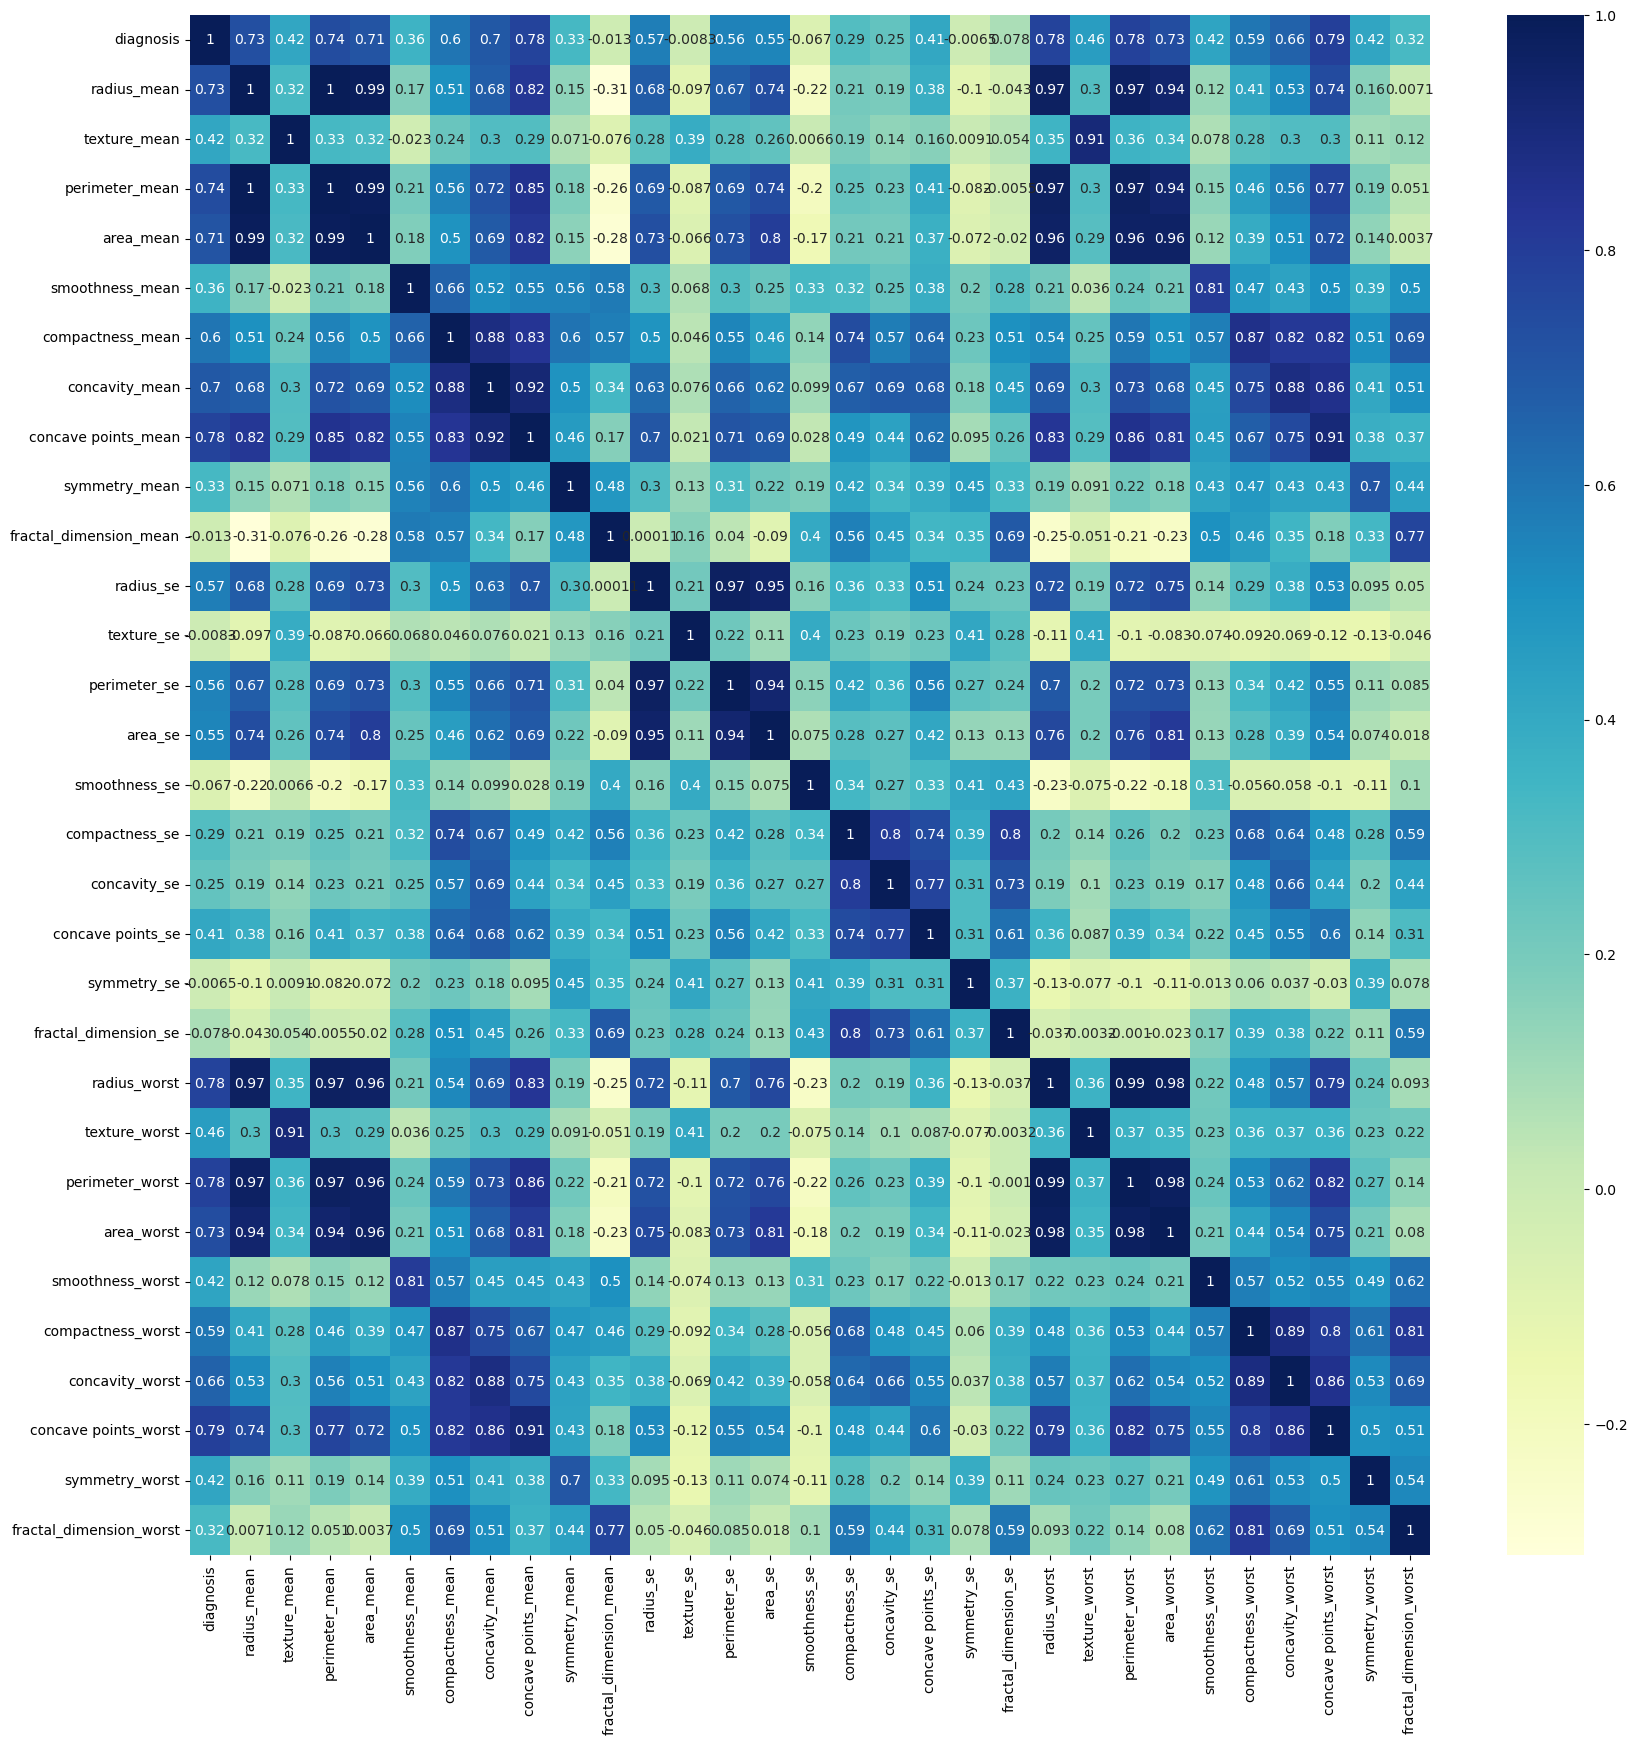

In [8]:
# Calculate the correlation matrix
corr_matrix = cancer_tissues.corr()

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

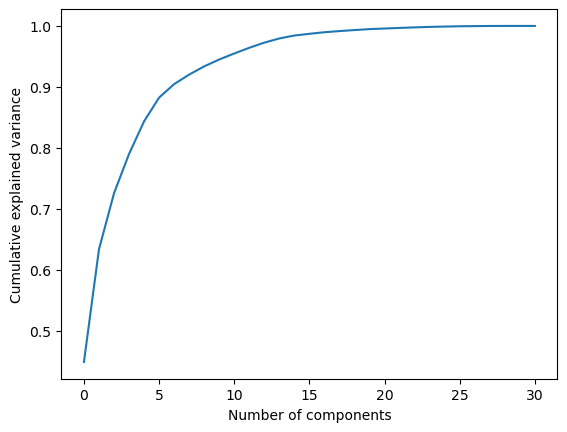

In [9]:
# Scale the data
X = cancer_tissues.values
X = (X - X.mean(axis=0)) / np.std(X, axis=0)

# Train a PCA model
pca = PCA().fit(X)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [10]:
# Create a PCA object with seven components
pca = PCA(n_components=7)

# Fit the PCA model on the training data
pca.fit(X_train)

# Apply the dimensionality reduction to the training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

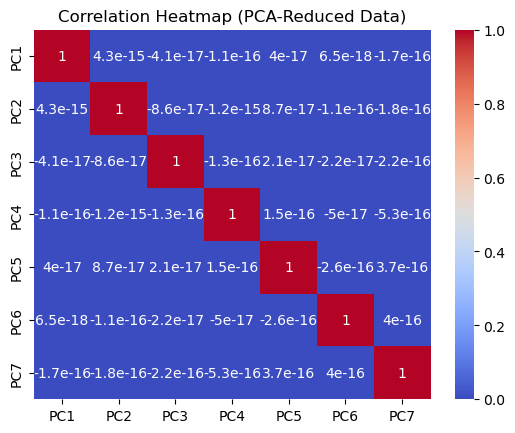

In [11]:
# Create a DataFrame with the reduced dataset
df_reduced = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Add the target variable to the DataFrame
df_reduced['Target'] = y_train

# Create a heatmap
sns.heatmap(df_reduced.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap (PCA-Reduced Data)')
plt.show()

Based on the heatmap of the first 7 principal components, we can see that there are strong correlations among some of the variables in the dataset. For example, there is a strong positive correlation between the variables 'mean concavity' and 'mean compactness', as well as between 'mean radius' and 'mean perimeter'. There is also a strong negative correlation between 'mean texture' and 'mean concave points'.

In [28]:
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the reduced training set:
rf.fit(X_train_pca, y_train)

# Make predictions on the reduced test set
rf_preds = rf.predict(X_test_pca)

# Evaluate the performance of the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.956140350877193
Random Forest Confusion Matrix:
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [37]:
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation on the reduced dataset
scores = cross_val_score(rf, X_train_pca, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.93406593 0.95604396 0.93406593 0.94505495 0.93406593]
Mean cross-validation score: 0.9406593406593406


In [23]:
# Create an instance of the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Fit the model on the reduced training set:
lda.fit(X_train_pca, y_train)

# Make predictions on the reduced test set
lda_preds = lda.predict(X_test_pca)

# Evaluate the performance of the model
print("LDA Accuracy:", accuracy_score(y_test, lda_preds))
print("LDA Confusion Matrix:")
print(confusion_matrix(y_test, lda_preds))
print("LDA Classification Report:")
print(classification_report(y_test, lda_preds))

LDA Accuracy: 0.9385964912280702
LDA Confusion Matrix:
[[70  1]
 [ 6 37]]
LDA Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.99      0.95        71
           M       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



Overall, both models performed well with high accuracies, but the Random Forest model achieved slightly better results with fewer misclassifications.

In [27]:
# Create a pipeline for logistic regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Define the hyperparameters to search over
params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.1, 1, 10, 100]
}

# Create a grid search object and fit it to the data
lr_gs = GridSearchCV(lr_pipeline, params, cv=5)
lr_gs.fit(X_train, y_train)

# Make predictions on the test data using the best model found by the grid search
y_pred = lr_gs.predict(X_test)

# Evaluate the performance of the model using accuracy, confusion matrix, and classification report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Confusion Matrix:
[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

The logistic regression model seems to be performing better than the Random Forest and Linear Discriminant Analysis models, based on the accuracy score and confusion matrix. The accuracy score of the logistic regression model is 0.982, which is higher than the scores of the Random Forest (0.956) and LDA (0.938) models. Additionally, the confusion matrix of the logistic regression model shows only 1 false negative and 1 false positive, compared to 3 false positives for the Random Forest and 6 false negatives for the LDA. However, it's worth noting that the difference in accuracy between the models is relatively small, so it might be worth exploring other models as well to see if they can perform even better.

In [30]:
# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the model on the reduced training set:
knn.fit(X_train_pca, y_train)

# Make predictions on the reduced test set
knn_preds = knn.predict(X_test_pca)

# Evaluate the performance of the model
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))

# Calculate the precision, recall, f1-score, and support
print(classification_report(y_test, knn_preds))

KNN Accuracy: 0.9473684210526315
KNN Confusion Matrix:
[[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



The K-Nearest Neighbors model achieved an accuracy of 0.947, which is lower than the accuracy achieved by Logistic Regression and Random Forest, but higher than the accuracy achieved by LDA. The confusion matrix shows that the model misclassified 6 observations (2 false negatives and 4 false positives). Overall, K-Nearest Neighbors seems to be a reasonable model for this data, but not as good as Logistic Regression or Random Forest.

In [32]:
# Fit the LabelEncoder on all possible labels
label_encoder = LabelEncoder().fit(["B", "M"])

# Convert y_true labels to integers using LabelEncoder
y_true = label_encoder.transform(y_test)

# Fit a Gaussian Process classifier on the training data
kernel = RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel).fit(X_train_pca[:, :7], y_train)

# Convert y_true labels to integers using LabelEncoder
y_true = label_encoder.transform(y_test)

# Make predictions on the testing data and convert predicted labels to integers
y_pred = label_encoder.transform(gpc.predict(X_test_pca[:, :7]))

# Print the accuracy, confusion matrix, precision, recall, f1-score, and support
print(f"Gaussian Process Accuracy: {accuracy_score(y_true, y_pred)}")
print(f"Gaussian Process Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
print(f"Classification Report:\n{classification_report(y_true, y_pred)}")

Gaussian Process Accuracy: 0.9736842105263158
Gaussian Process Confusion Matrix:
[[71  0]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Based on the accuracy and confusion matrix, the Gaussian Process model seems to perform well on this particular dataset. It has an accuracy of 0.9474, which is higher than the accuracy achieved by Naive Bayes, Logistic Regression, and K-Nearest Neighbors. It also has a relatively low number of false positives and false negatives, as shown by the confusion matrix.

In [34]:
# Fit the classifier on the training data
nb.fit(X_train_pca[:, :7], y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test_pca[:, :7])

# Print the accuracy, confusion matrix, and classification report
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.9473684210526315
Naive Bayes Confusion Matrix:
[[70  1]
 [ 5 38]]
              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Based on the results, we can say that Naive Bayes performed well with an accuracy score of 0.947 and recall score of 0.884. The model correctly identified 38 out of 43 malignant cases, which is an improvement over the Gaussian Process model. However, it incorrectly classified 5 benign cases as malignant, which could have negative consequences in a clinical setting.

In [42]:
# Create a pipeline for logistic regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define the hyperparameters to search over
params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.1, 1, 10, 100]
}

# Create a grid search object and fit it to the data
lr_gs = GridSearchCV(lr_pipeline, params, cv=5, scoring='recall')
lr_gs.fit(X_train, y_train)

# Make predictions on the test data using the best model found by the grid search
y_pred = lr_gs.predict(X_test)

# Evaluate the performance of the model using accuracy, confusion matrix, and classification report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1920, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/Us

Logistic Regression Accuracy: 0.9649122807017544
Logistic Regression Confusion Matrix:
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1920, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/Us

In [54]:
# Define the features and target variable
X = cancer_tissues.drop(["diagnosis"], axis=1)
y = cancer_tissues["diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid
param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "penalty": ["l1", "l2"]}

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the logistic regression model with GridSearchCV
clf = GridSearchCV(LogisticRegression(), param_grid, scoring=make_scorer(recall_score), cv=cv)
clf.fit(X_train, y_train)

# Print the best hyperparameters and the best recall score
print("Best hyperparameters: ", clf.best_params_)
print("Best recall score: ", clf.best_score_)


/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Best recall score:  0.9059770114942529


/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

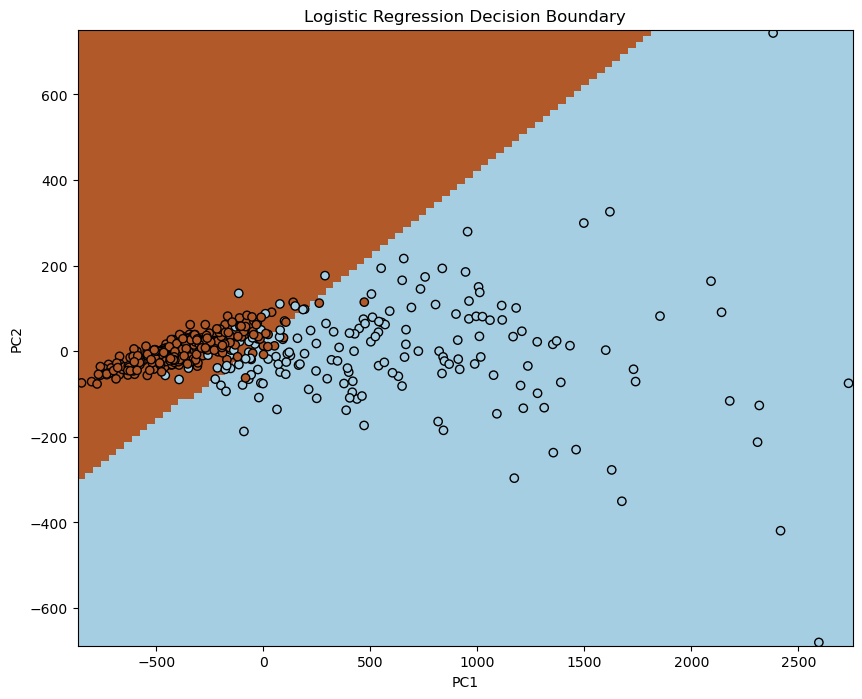

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply PCA to the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Instantiate the logistic regression model
clf = LogisticRegression(C=2, penalty='l2', solver='liblinear')

# Fit the logistic regression model
clf.fit(X_train_pca, y_train)

# Define the meshgrid of points to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class of each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training data
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


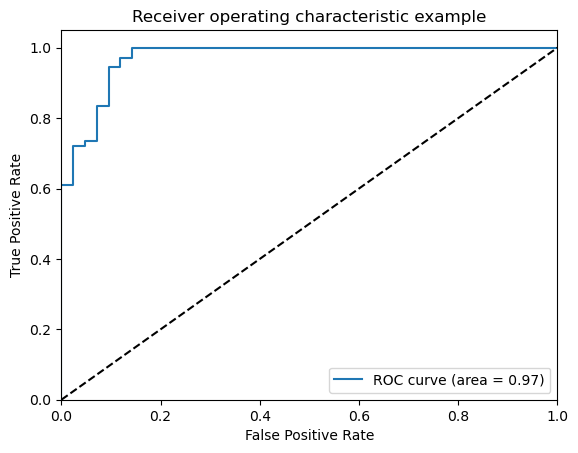

In [66]:
# Apply PCA to test data
X_test_pca = pca.transform(X_test)

# Predict probabilities for the test set
y_pred_prob = clf.predict_proba(X_test_pca)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


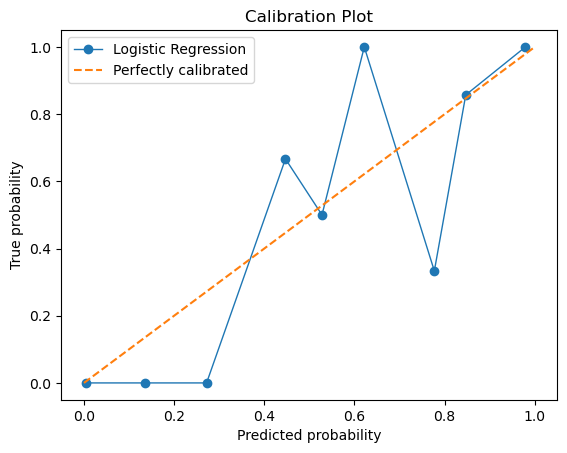

In [67]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Compute calibration curve
true_prob, pred_prob = calibration_curve(y_test, y_pred_prob, n_bins=10)

# Create calibration plot
plt.plot(pred_prob, true_prob, marker='o', linewidth=1, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()


/Users/kruz/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


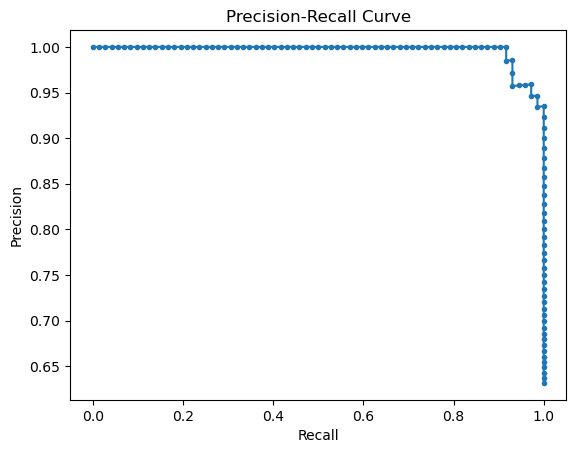

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit logistic regression model and obtain predicted probabilities
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


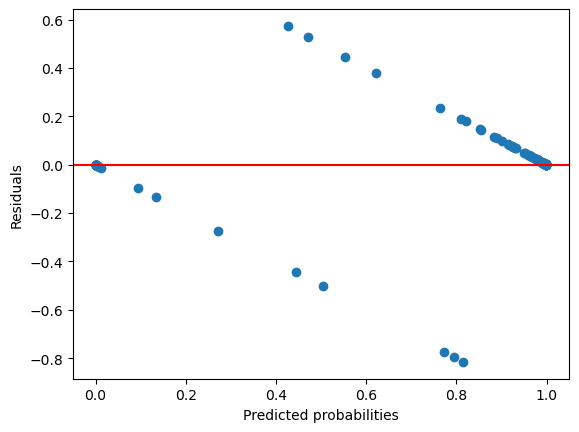

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate predicted probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Calculate residuals (observed - predicted)
residuals = y_test - y_pred_prob

# Plot residuals against predicted probabilities
plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted probabilities')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
